# <a href="https://thetahat.ru/courses/bm-2024-aut">Статистика ФБМФ</a>
## Домашнее задание 12

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_st_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 25 баллов
* Задача 2 &mdash; 35 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 30 баллов


-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Bot check

# HW_ID: st_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm as tqdm
from scipy import integrate
import scipy.stats as sps
from scipy.stats import ttest_rel, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm as tqdm

sns.set(font_scale=1.3, palette='Set2')
%matplotlib inline

**ВАЖНОЕ ЗАМЕЧАНИЕ**: выбирая статистический тест и интерпретируя результаты, помните о нулевой гипотезе и мощности. Например, немного об этом в контексте АВ тестов можно почитать [здесь](https://habr.com/ru/companies/avito/articles/709596/).

## <b><i><font color="blue">Легкая часть</font></i></b>


### Задача 1


Рассмотрим данные об экспрессии белка DYRK1_A в мышах в разные дни. Загрузите датасет с сайта курса. Постройте гистограммы распределений и проведите t-test, чтобы выяснить, различается ли средний уровень экспрессии белка в день 1 и 2.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIPT/mice_expression.csv')
df.head()

,MouseID,Day 1,Day 2
0,309_1,0.503644,0.579893
1,309_2,0.514617,0.305341
2,309_3,0.509183,0.972346
3,309_4,0.442107,0.527091
4,309_5,0.434940,0.517172


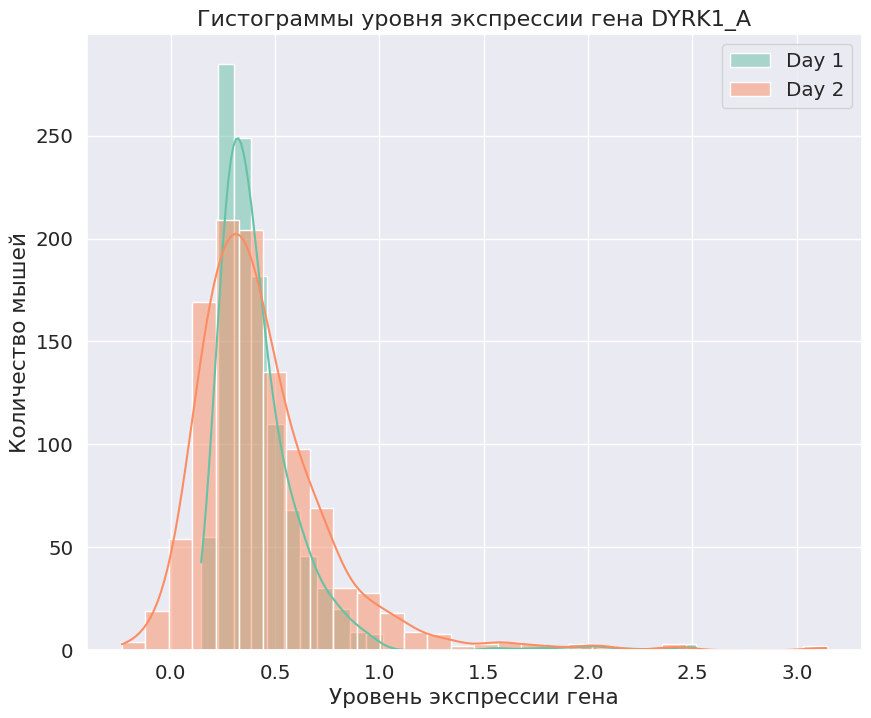

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['Day 1'],  label='Day 1', kde=True, bins=30, alpha=0.5)
sns.histplot(df['Day 2'],  label='Day 2', kde=True, bins=30, alpha=0.5)
plt.title('Гистограммы уровня экспрессии гена DYRK1_A', fontsize=16)
plt.xlabel('Уровень экспрессии гена')
plt.ylabel('Количество мышей')
plt.legend()
plt.show()

In [ ]:
t_statistic, p_value = sps.ttest_rel(df['Day 1'], df['Day 2'], alternative = 'less')
t_statistic, p_value

(-2.1925908404058365, 0.014275211638324677)

Объясните выбор теста и сделайте выводы.

**Вывод:**

В задании нас просят сравнить средние значения уровня экспрессии гена, при этом распределения нормальные. А также, уровень экспрессии измеряли у одних и тех же мышей просто в разные дни, а значит выборки зависимые. Поэтому используем ttest_rel.

Исходя из полученного значения p_value = 0.014 < 0.05 (заранее выбранного уровня значимости) можем сделать вывод, что средние уровни экспрессии в разные дни отличаются. Отвергая нулевую гипотезу в пользу альтернативы, средний уровень экспрессии статистически значимо больше во второй день.

### Задача 2


Рассмотрим [данные о расстройствах сна](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv):

Датасет содержит информацию о образе жизни людей, целевая переменная — есть ли у них расстройство сна.

С помощью методов дисперсионного анализа исследуйте, по каким параметрам наблюдается различие между двумя рассматриваемыми классами (теми, у кого есть расстройство сна и теми, у кого нет).

Скачайте файл и оставьте колонки:
* `Age` &mdash; возраст;
* `Sleep Duration` &mdash; длительность сна;
* `Physical Activity Level` &mdash; уровень физической активности;
* `Heart Rate` &mdash; ЧСС;
* `Daily Steps` &mdash; число пройденных шагов в день;
* `Sleep Disorder` &mdash; целевая переменная;

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MIPT/Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
columns = ['Age', 'Sleep Duration',
           'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

In [ ]:
data = data[columns]
data

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,42,77,4200,NaN
1,28,6.2,60,75,10000,NaN
2,28,6.2,60,75,10000,NaN
3,28,5.9,30,85,3000,Sleep Apnea
4,28,5.9,30,85,3000,Sleep Apnea
...,...,...,...,...,...,...
369,59,8.1,75,68,7000,Sleep Apnea
370,59,8.0,75,68,7000,Sleep Apnea
371,59,8.1,75,68,7000,Sleep Apnea
372,59,8.1,75,68,7000,Sleep Apnea


Для упрощения задачи не будем рассматривать вид расстройства сна &mdash; только есть оно или нет.

In [ ]:
dis = data.loc[:, 'Sleep Disorder'].copy()
dis[~dis.isna()] = 'Disorder'
dis[dis.isna()] = 'No disorder'
data.loc[:, 'Sleep Disorder'] = dis
data

,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps,Sleep Disorder
0,27,6.1,42,77,4200,No disorder
1,28,6.2,60,75,10000,No disorder
2,28,6.2,60,75,10000,No disorder
3,28,5.9,30,85,3000,Disorder
4,28,5.9,30,85,3000,Disorder
...,...,...,...,...,...,...
369,59,8.1,75,68,7000,Disorder
370,59,8.0,75,68,7000,Disorder
371,59,8.1,75,68,7000,Disorder
372,59,8.1,75,68,7000,Disorder


Визуализируйте распределение признаков при разных значениях целевой переменной (например, с помощью pairplot)

<Figure size 1200x800 with 0 Axes>

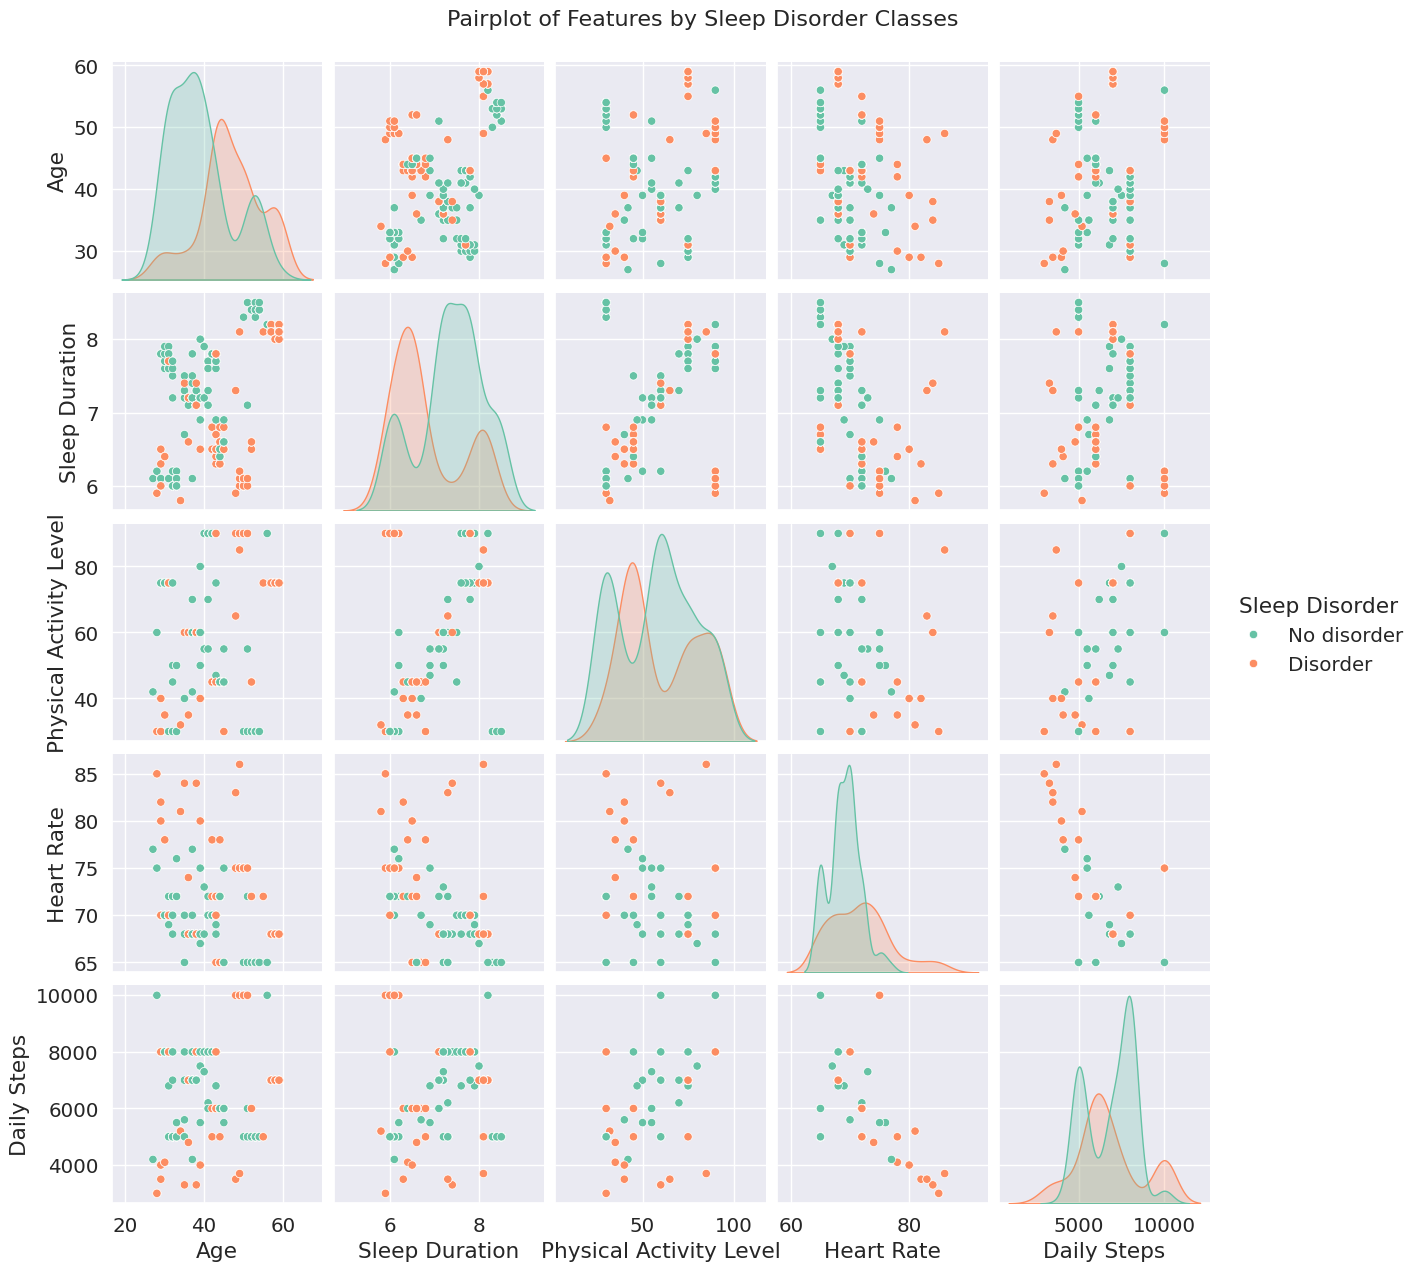

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='Sleep Disorder', diag_kind='kde')
plt.suptitle('Pairplot of Features by Sleep Disorder Classes', y=1.02, fontsize=16)
plt.show()

Насколько сильно отличаются распределения между классами? Есть ли очевидные отличия?

**Вывод:**

На диаграмме парных распределений видим следующее:

1. Age:
   Распределения по возрасту перекрываются, но среди старших возрастов класс с расстройствами сна представлен больше.

2. Sleep Duration:
   Тут видно, что пики с укороченным сном есть в обеих группах, но у класса 'disorder' с расстройствами сна этот пик выше. Людям с расстройствами сна свойственна короткая продолжительность сна.

3. Physical Activity Level:
   Люди без расстройств сна чаще всего ведут активный образ жизни, а для группы с расстройством сна характерна сниженная активность.

4. Heart Rate:
   Среди людей с расстройством сна чаще есть люди с повышенным ЧСС.

5. Daily Steps:
   Среди людей с расстройством сна намного чаще есть люди с очень маленьким количеством шаков (<4000)

Оцените, по каким признакам различаются классы. Объясните выбор статистического теста.

Некоторые различия заметны по каждому параметру, но самые яркие по возрасту, продолжительности сна и частоте сердечных сокращений.

In [ ]:
results_list = []
data1 = data[data['Sleep Disorder'] == 'None']
data2 = data[data['Sleep Disorder'] == 'Disorder']
for feature in ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']:
    result = sps.ttest_ind(data1[feature], data2[feature], equal_var=False)

    results_list.append({
        'Feature': feature,
        'Statistic': result.statistic,
        'p-value': result.pvalue
    })


results = pd.DataFrame(results_list)
results

,Feature,Statistic,p-value
0,Age,NaN,NaN
1,Sleep Duration,NaN,NaN
2,Physical Activity Level,NaN,NaN
3,Heart Rate,NaN,NaN
4,Daily Steps,NaN,NaN


Оформите результаты в таблице pandas

In [ ]:
results = []
data1 = data[data['Sleep Disorder'] == 'No disorder']
data2 = data[data['Sleep Disorder'] == 'Disorder']
for feature in ['Age', 'Sleep Duration', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']:
    result = sps.ttest_ind(data1[feature], data2[feature], equal_var=False)

    results.append({
        'Параметр': feature,
        'Статистика': result.statistic,
        'p-value': result.pvalue
    })

In [ ]:
results = pd.DataFrame(results)
results

,Параметр,Статистика,p-value,Adjusted p-value
0,Age,-9.236527,3.133525e-18,1.566763e-17
1,Sleep Duration,6.876330,3.225147e-11,1.612573e-10
2,Physical Activity Level,-1.352583,1.771023e-01,8.855115e-01
3,Heart Rate,-6.102523,4.919397e-09,2.459698e-08
4,Daily Steps,0.487187,6.265259e-01,1.000000e+00


Какой тест вы использовали? Какие выводы можно сделать по p-value?

**Вывод:** Использовался ttest_ind, так как необходим параметрический тест (распределение не сильно интересно) для независимых выборок (данные о разных людях) с неодинаковой дисперсией (следует из распределений).

Исходя из полученных значений p-value можем сделать вывод, что нулевую гипотезу о равенстве матожиданий распределений можем отвергнуть (p-value < alpha) для параметров возраста, длительности сна и частоте сердцебиений. Матожидания этих распределений не равны и расстройство сна как-то влияет на эти параметры. Для  физической активности и ежедневных шагов нулевую гипотезу отвергнуть нельзя.

Достаточно ли в этом случае только посчитать p-value или надо еще что-то сделать? Если да, то реализуйте алгоритм


In [ ]:
# можно провести поправку на множественное тестирование
from statsmodels.stats.multitest import multipletests
results['Adjusted p-value'] = multipletests(results['p-value'], method='bonferroni')[1]


In [ ]:
results

,Параметр,Статистика,p-value,Adjusted p-value
0,Age,-9.236527,3.133525e-18,1.566763e-17
1,Sleep Duration,6.876330,3.225147e-11,1.612573e-10
2,Physical Activity Level,-1.352583,1.771023e-01,8.855115e-01
3,Heart Rate,-6.102523,4.919397e-09,2.459698e-08
4,Daily Steps,0.487187,6.265259e-01,1.000000e+00


Выводы не изменились

### Задача 3

Обычно в практических задачах используют t-test из-за его легкой интерпретируемости. Однако нередко можно встретить и использование критерия Манн-Уитни, но (ОСТОРОЖНО СПОЙЛЕРЫ) не всегда это уместно и могут произойти совсем неожиданные вещи.

**1.** Сгенерируем выборки из смеси экспоненциальных распределений. Основная часть объектов будет иметь небольшое среднее и лишь некоторые из них &mdash; достаточно большое.

In [ ]:
def generate_mix_expon(sample_sizes=[100, 10], scale=[1, 10]):
    ''' Генерация выборки из смеси двух экспоненциальных распределений. '''

    x1 = np.random.exponential(size=sample_sizes[0], scale=scale[0])
    x2 = np.random.exponential(size=sample_sizes[1], scale=scale[1])
    return np.concatenate([x1, x2])

Во второй выборке немного увеличим среднее первой компоненты и сильно уменьшим среднее второй

In [ ]:
x = generate_mix_expon(sample_sizes=[1000, 100], scale=[1, 15])
y = generate_mix_expon(sample_sizes=[1000, 100], scale=[1.2, 10])

Визуализируйте распределение выборок

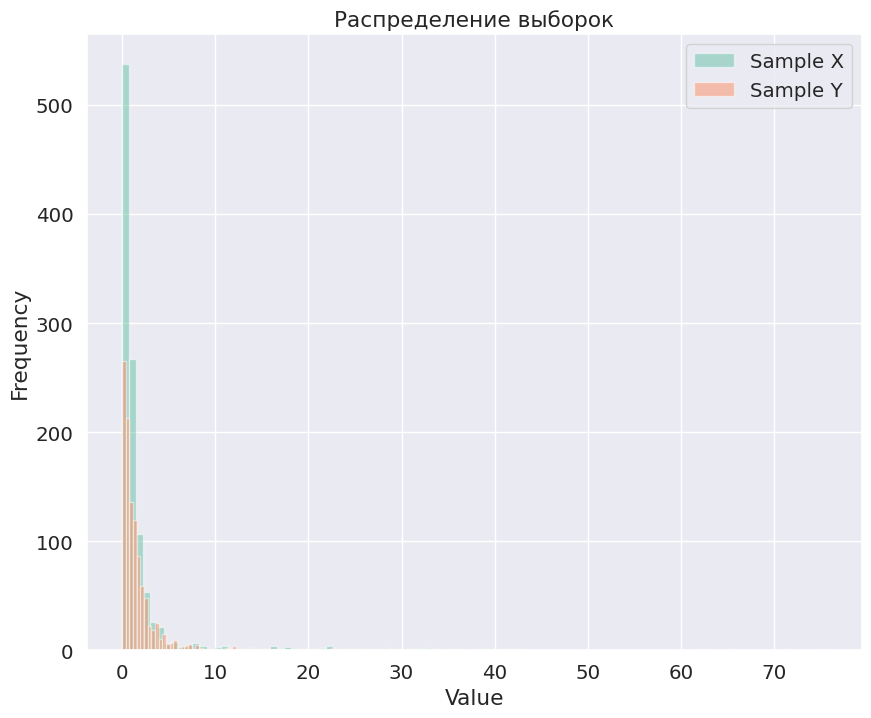

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(x, bins=100, alpha=0.5, label="Sample X")
plt.hist(y, bins=100, alpha=0.5, label="Sample Y")
plt.title("Распределение выборок")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

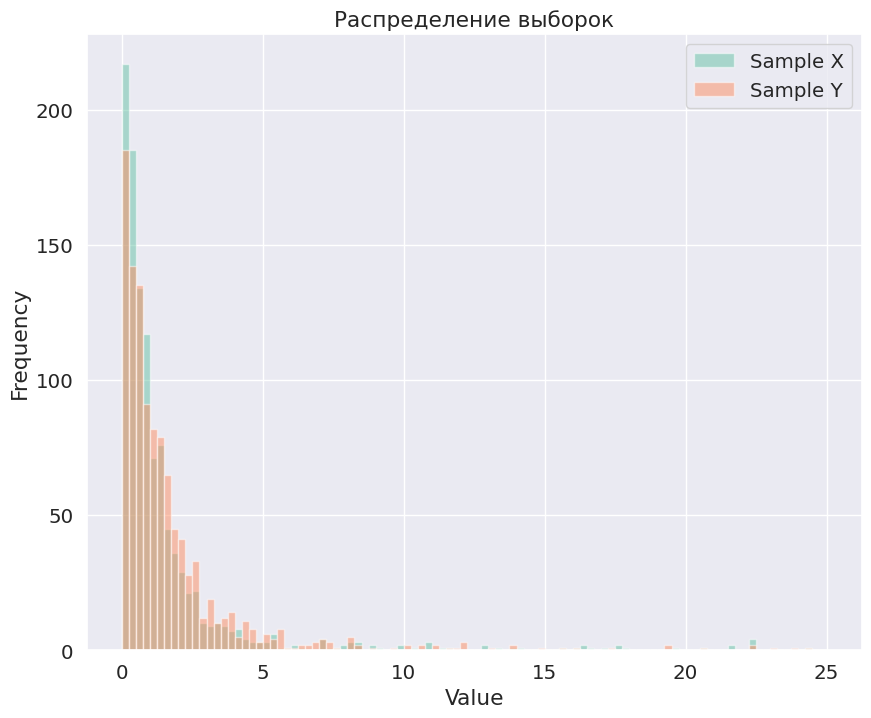

In [ ]:
# Посмотрим на распределения без таких сильных выбросов
plt.figure(figsize=(10, 8))
plt.hist(x, bins=100, alpha=0.5, label="Sample X", range=[0, 25])
plt.hist(y, bins=100, alpha=0.5, label="Sample Y", range=[0, 25])
plt.title("Распределение выборок")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Как отличается среднее у этих двух выборок?

In [ ]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print(f"Среднее выборки X: {x_mean}")
print(f"Среднее выборки Y: {y_mean}")

Среднее выборки X: 2.3712339461204177
Среднее выборки Y: 2.009451440795473


**Ответ:** Среднее выборки X больше среднего значения выборки Y

**2.** Проверьте с помощью t-test гипотезу об отсутствии эффекта против альтернативы *положительного* эффекта

In [ ]:
t_stat, p_value = sps.ttest_ind(x, y, equal_var=False, alternative='less')

print(f"T-статистика: {t_stat}")
print(f"p-value: {p_value}")

T-статистика: 1.5845222826071317
p-value: 0.9433741152785785


Какой результат проверки гипотезы:

**Ответ:**

P-value > 0.05 так что нулевую гипотезу не отвергаем, хотя должны. Такая ошибка возникает из-за большого количества выбросов.

Проверьте с помощью критерий Манна-Уитни гипотезу об отсутствии эффекта против альтернативы *положительного* эффекта

In [ ]:
u_stat, p_value = sps.mannwhitneyu(x, y, alternative='less')
print(f"U-статистика: {u_stat}")
print(f"p-value: {p_value}")

U-статистика: 548444.0
p-value: 7.343008277351892e-05


Прокомментируйте результат.

**Ответ**

Критерий Манн-Уитни показывает себя намного лучше с такой выборкой. По значению p-value отвергаем нулевую гипотезу в пользу той, что функция распределения x меньше y. То есть для экспоненциального распределения матожидание для x меньше, чем y, что соответсвует истине.

Не редко при работе с выбросами аналитики начинают логарифмировать метрики, т.к. после такой процедуры данные становятся примерно одинаковыми. Проведите подобный эксперимент, передав в критерий t-test прологарифмированные значения.

T-статистика после логарифмирования: -2.464384180640396
P-value после логарифмирования: 0.006900574140238497


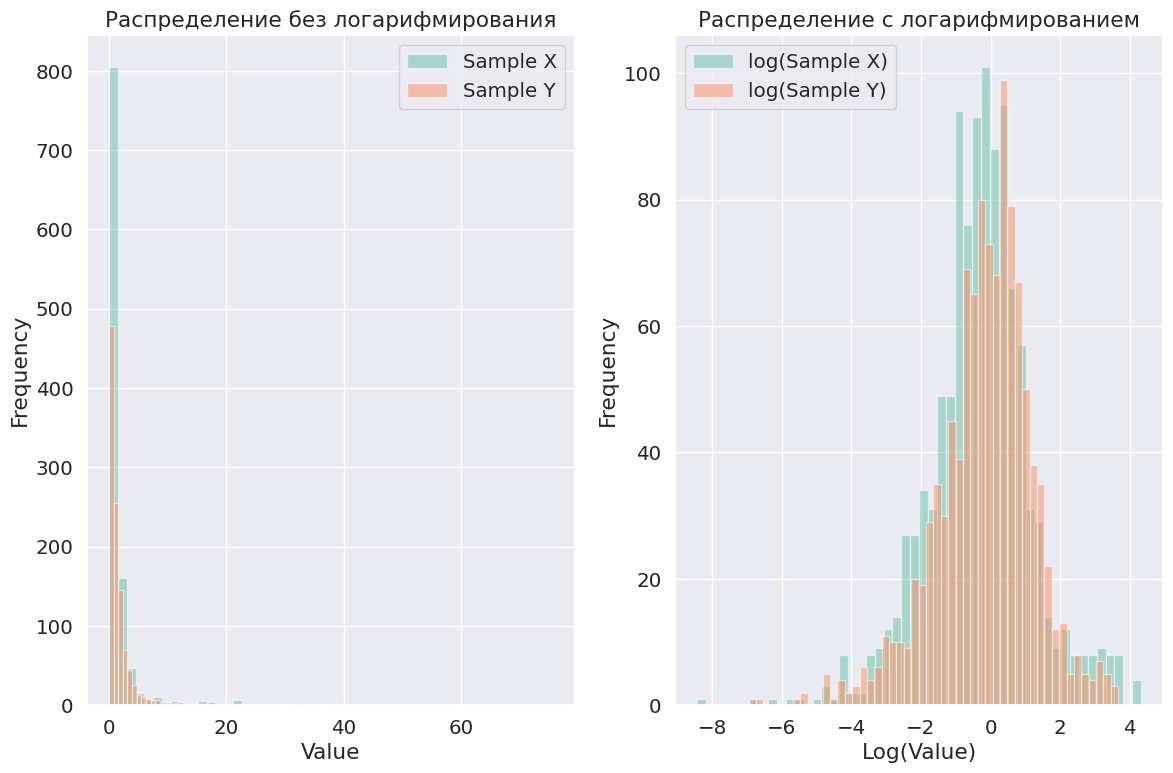

In [ ]:
log_x = np.log(x)
log_y = np.log(y)

log_t_stat, log_p_value = sps.ttest_ind(log_x, log_y, equal_var=False, alternative='less')

print(f"T-статистика после логарифмирования: {log_t_stat}")
print(f"P-value после логарифмирования: {log_p_value}")
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.hist(x, bins=50, alpha=0.5, label="Sample X")
plt.hist(y, bins=50, alpha=0.5, label="Sample Y")
plt.title("Распределение без логарифмирования")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(log_x, bins=50, alpha=0.5, label="log(Sample X)")
plt.hist(log_y, bins=50, alpha=0.5, label="log(Sample Y)")
plt.title("Распределение с логарифмированием")
plt.xlabel("Log(Value)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

**3.** А вдруг все эти результаты -- лишь случайное стечение обстоятельств? Давайте проведем серию экспериментов, посчитаем разницу средних и проверим критерии

In [ ]:
n_iter = 2_000

diff_array = np.zeros(n_iter)
stats_array = np.zeros((3, n_iter))

for i in range(n_iter):
    x = generate_mix_expon(sample_sizes=[1000, 100], scale=[1, 15])
    y = generate_mix_expon(sample_sizes=[1000, 100], scale=[1.2, 10])

    diff_array[i] = x.mean() - y.mean()
    stats_array[0, i] = sps.ttest_ind(x, y, equal_var=False, alternative='greater')[0]
    stats_array[1, i] = sps.ttest_ind(np.log(x), np.log(y), equal_var=False, alternative='greater')[0]
    stats_array[2, i] =  sps.mannwhitneyu(x, y, alternative='less')[0]

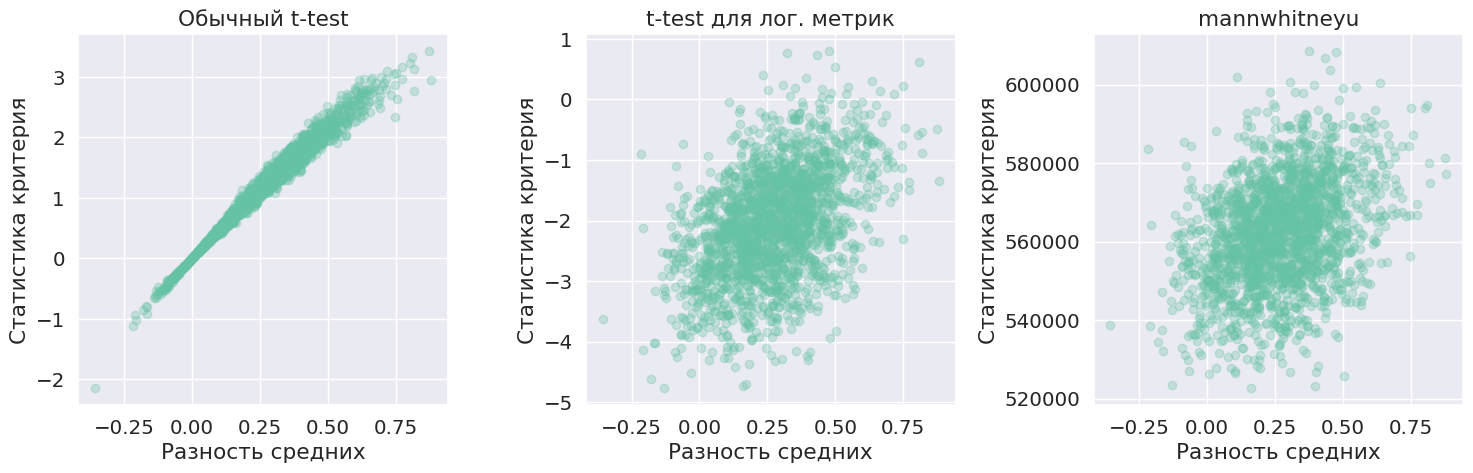

In [ ]:
plt.figure(figsize=(15, 5))
titles = [
    'Обычный t-test',
    't-test для лог. метрик',
    'mannwhitneyu',
]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.scatter(diff_array, stats_array[i], alpha=0.3)
    plt.title(titles[i])
    plt.xlabel('Разность средних')
    plt.ylabel('Статистика критерия')

plt.tight_layout()

Проинтерпретируйте результаты

**Ответ:**
в случае t-test видно, что с увеличением разности средних увеличивается статистика, причём с малым разбросом (высокая корреляция). Тогда с большой вероятностью отвергается нулевая гипотеза.

В случае логарифмирования или теста Манн-Уитни значения так же неслучайны - в целом корреляция есть, просто наши точки более разбросаны.

**4.** И в заключении посмотрим как эти критерии контролируют ошибку первого рода. Для этого проведите серию АА-тестов. Код уже реализован, вам остается лишь передать в него необходимые параметры

In [ ]:
def calculate_real_alpha(n_reject, n_iter):
    '''
    Оценка реального уровня значимости и его дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_reject -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы соотв. дов. интервала
    '''

    real_alpha = n_reject / n_iter
    std = np.sqrt(real_alpha * (1-real_alpha) / n_iter)
    left_bound = real_alpha - 2 * std
    right_bound = real_alpha + 2 * std

    return real_alpha, left_bound, right_bound


def draw_interval(
    real_alpha, left_bound, right_bound,
    alpha=0.05, new_fig=True
):
    '''
    Отрисовка интервала для вероятности отвержения критерия

    Аргументы:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы дов. интервала
    alpha -- теоретический уровень значимости
    new_fig -- coздавать ли новую matplotlib figure
    '''

    if new_fig:
        plt.figure(figsize=(7, 3.5))

    plt.hlines(0, 0, 1,
               color='black', lw=2, alpha=0.6)
    plt.vlines(alpha, -1, 1,
               color='red', lw=2, linestyle='--', alpha=0.6)
    plt.fill_between([left_bound, right_bound], [0.1]*2, [-0.1]*2,
                     color='green', alpha=0.6)
    plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
    plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
    plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
    plt.ylim((-0.5, 0.5))
    plt.yticks([])

In [ ]:
def AB_test(test, add_logarithm = False, alternative='two-sided', n_iter=10_000, sample_size=1_000, alpha=0.05
):
    '''
    Проведение серии AB-тестов на искусственных выборках.

    Аргументы:
    test -- валидируемый тест из scipy.stats
    add_logarithm -- нужно ли логарифмировать метрику
    alternative -- альтернативная гипотеза
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- уровень значимости
    '''

    n_reject = 0  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        x = generate_mix_expon(sample_sizes=[1000, 100], scale=[1, 15])
        y = generate_mix_expon(sample_sizes=[1000, 100], scale=[1.2, 10])
        if add_logarithm:
            n_reject += (test(np.log(x), np.log(y), alternative=alternative)[1] < alpha)
        else:
            n_reject += (test(x, y, alternative=alternative)[1] < alpha)

    # Реальный уровень значимости
    real_alpha, left_bound, right_bound = calculate_real_alpha(n_reject, n_iter)
    print('{:.4f} +/- {:.4f}'.format(
        real_alpha, (right_bound - left_bound)/2
    ))

    plt.figure(figsize=(14, 3.5))


    # График интервала
    with sns.axes_style("whitegrid"):
        plt.subplot(1, 2, 2)
        draw_interval(
            real_alpha, left_bound, right_bound,
            alpha=alpha, new_fig=False
        )

    plt.tight_layout()

In [ ]:
n_iter = 20000  # количество итераций в одном эксперименте
alpha = 0.05  # уровень значимости

100%|██████████| 20000/20000 [00:45<00:00, 442.57it/s]


0.0001 +/- 0.0001


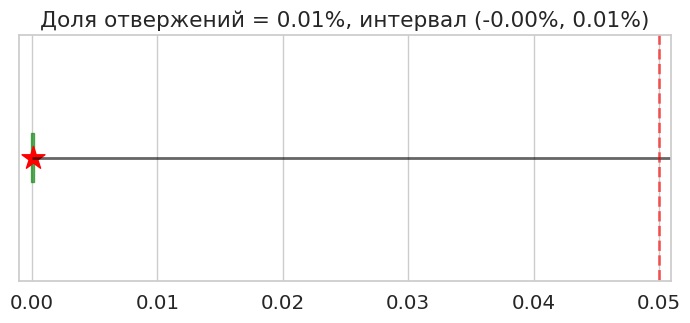

In [ ]:
# Обычный T-test
AB_test(sps.ttest_ind, add_logarithm = False, n_iter = n_iter, alpha = alpha, alternative='less')

100%|██████████| 20000/20000 [00:44<00:00, 445.70it/s]


0.6832 +/- 0.0066


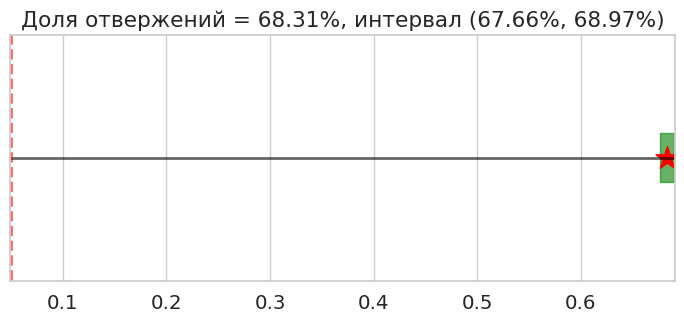

In [ ]:
# T-test c логарифмированной метрикой
AB_test(sps.ttest_ind, add_logarithm = True, n_iter = n_iter, alpha = alpha, alternative='less')

100%|██████████| 20000/20000 [00:37<00:00, 530.80it/s]


0.9119 +/- 0.0040


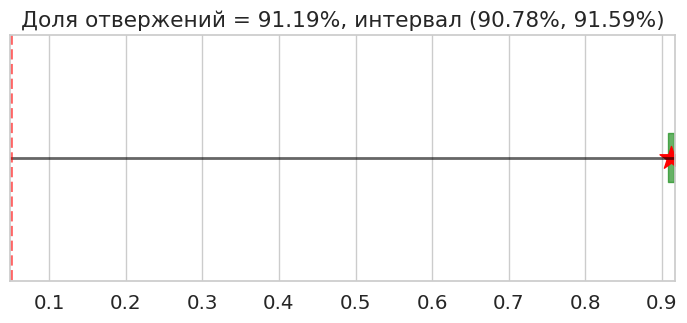

In [ ]:
# Критерий М-У
AB_test(sps.mannwhitneyu, add_logarithm = False, n_iter = n_iter, alpha = alpha, alternative='less')

**Вывод:**
На резуьтаты использования t-test сильно влияет ненормальность распределения и выбросы. Поэтому t-test неприменим для данной выборки из-за мощности, чувствительности или ненормальности данных. Это можно решить с помощью логарифмирования данных log t-test. Таким образом нулевая гипотеза отвергается лучше, чем T-test (нивелируются выбросы).
Манн-Уитни сильно чаще обнаруживает эффект, чем T-test и подходит в ситуациях с выбросами. Но из-за своей чувствительности  Манн-Уитни не проходит A/B-test.

## <b><i><font color="orange">Сложная часть</font></i></b>

### Задача 4


Рассмотрим [данные по медицинским страховкам](https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv):

Скачайте файл с тренировочными данными и оставьте колонку:
* `charges` &mdash; стоимость страховки человека.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MIPT/Train_Data.csv')
data = data['charges']
data.head()

,charges
0,3279.868550
1,21454.494239
2,1720.353700
3,6801.437542
4,11946.625900


Министерство здравоохранения хочет провести AB-тест для оценки значимости эффекта от новых рекомендаций по употреблению витаминов и использовать для этого t-test независимых выборок. Ожидается, что новые рекомендации повысят здоровье общества и снизят траты на страховку. На время тестирования решено выдать рекомендации случайной группе из 1000 людей.

**1.**
Проведите 2000 случайных AA-тестов для проверки правильности работы t-test. Использовать нужно группы одинакого размера, конечно же, они не должны пересекаться. Используйте код с семинара (функция `AB_test` из предыдущей задачи в этом случае **НЕ** подойдет)

In [ ]:
def AB_test(data, n_iter=2_000, sample_size=1_000, alpha=0.05):
    '''
    Проведение серии AB-тестов на искусственных выборках.
    Аргументы:
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- уровень значимости
    '''

    n_reject = 0  # количество отвержений H_0
    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        x = data.sample(sample_size, replace=False)
        y = data.drop(x.index).sample(sample_size, replace=False)
        n_reject += (sps.ttest_ind(x, y, equal_var=False)[1] < alpha)

    # Реальный уровень значимости
    real_alpha, left_bound, right_bound = calculate_real_alpha(n_reject, n_iter)
    print('{:.4f} +/- {:.4f}'.format(
        real_alpha, (right_bound - left_bound)/2
    ))

    plt.figure(figsize=(14, 3.5))

    # График интервала
    with sns.axes_style("whitegrid"):
        plt.subplot(1, 2, 2)
        draw_interval(
            real_alpha, left_bound, right_bound,
            alpha=alpha, new_fig=False
        )

    plt.tight_layout()

def calculate_real_alpha(n_reject, n_iter):
    '''
    Оценка реального уровня значимости и его дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_reject -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы соотв. дов. интервала
    '''

    real_alpha = n_reject / n_iter
    std = np.sqrt(real_alpha * (1-real_alpha) / n_iter)
    left_bound = real_alpha - 2 * std
    right_bound = real_alpha + 2 * std

    return real_alpha, left_bound, right_bound

def draw_interval(
    real_alpha, left_bound, right_bound,
    alpha=0.05, new_fig=True
):
    '''
    Отрисовка интервала для вероятности отвержения критерия

    Аргументы:
    real_alpha -- оценка реального уровня значимости
    left_bound, right_bound -- границы дов. интервала
    alpha -- теоретический уровень значимости
    new_fig -- coздавать ли новую matplotlib figure
    '''

    if new_fig:
        plt.figure(figsize=(7, 3.5))

    plt.hlines(0, 0, 1,
               color='black', lw=2, alpha=0.6)
    plt.vlines(alpha, -1, 1,
               color='red', lw=2, linestyle='--', alpha=0.6)
    plt.fill_between([left_bound, right_bound], [0.1]*2, [-0.1]*2,
                     color='green', alpha=0.6)
    plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
    plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
    plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
    plt.ylim((-0.5, 0.5))
    plt.yticks([])


100%|██████████| 2000/2000 [00:06<00:00, 300.26it/s]


0.0455 +/- 0.0093


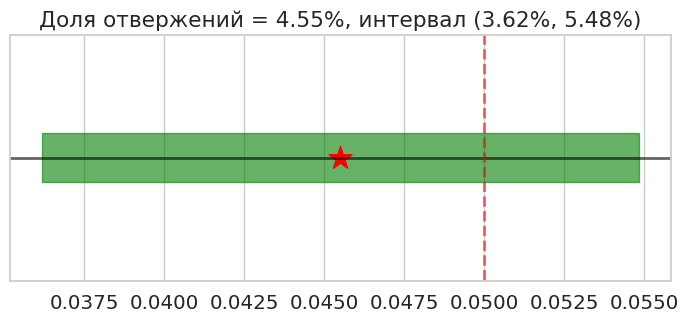

In [ ]:
AB_test(data, n_iter=2_000, sample_size=1_000, alpha=0.05, )

Можно сделать вывод, что критерий применим

Вспомните, какое распределение имеет величина p-value в случае, если нулевая гипотеза верна?

**Ответ:**
Равномерное

Постройте гистограмму значений p-value. Корректно ли работает t-test на ваших данных?

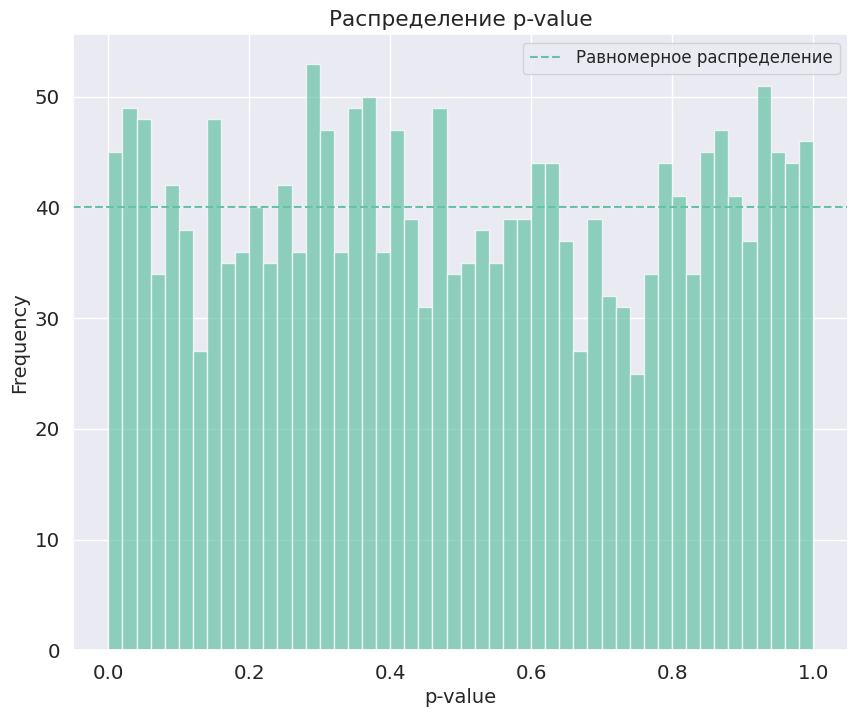

In [ ]:
n_iter = 2000
sample_size = 1000
p_values = []
for _ in range(n_iter):
    X = data.sample(sample_size, replace=False)
    Y = data.drop(X.index).sample(sample_size, replace=False)
    p_values.append(sps.ttest_ind(X, Y, equal_var=False)[1])

plt.figure(figsize=(10, 8))
plt.hist(p_values, bins=50, alpha=0.7)
plt.title("Распределение p-value")
plt.xlabel("p-value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axhline(y=n_iter/50, linestyle='--', label='Равномерное распределение')
plt.legend(fontsize=12)
plt.show()


In [ ]:
print(f"Среднее значение p-value: {np.mean(p_values)}")
print(f"Доля p-value < alpha = 0.05: {np.mean(np.array(p_values) < 0.05)}")

Среднее значение p-value: 0.49810102613768975
Доля p-value < alpha = 0.05: 0.057


**Вывод:** Из среднего значения и теста можем сделать вывод, что T-test работает корректно

**2.** Зафиксируйте две выборки одинакового размера: контрольную и тестовую. С помощью проведения AB-теста выясните, какова мощность теста для разных значений эффекта, т.е. нарисуйте график зависимости мощности от значения добавляемого эффекта. Схема проведения аналогична предыдущему пункту, но к тестовой группе нужно добавить отрицательное смещение.

При добавлении искусственного смещения рекомендуется также добавлять небольшой шум для каждого человека. Шум необходимо добавлять для того, чтобы не происходило резкого смещения значения у всех элементов выборки, а постепенно менялось общее среднее. Сделайте выводы.


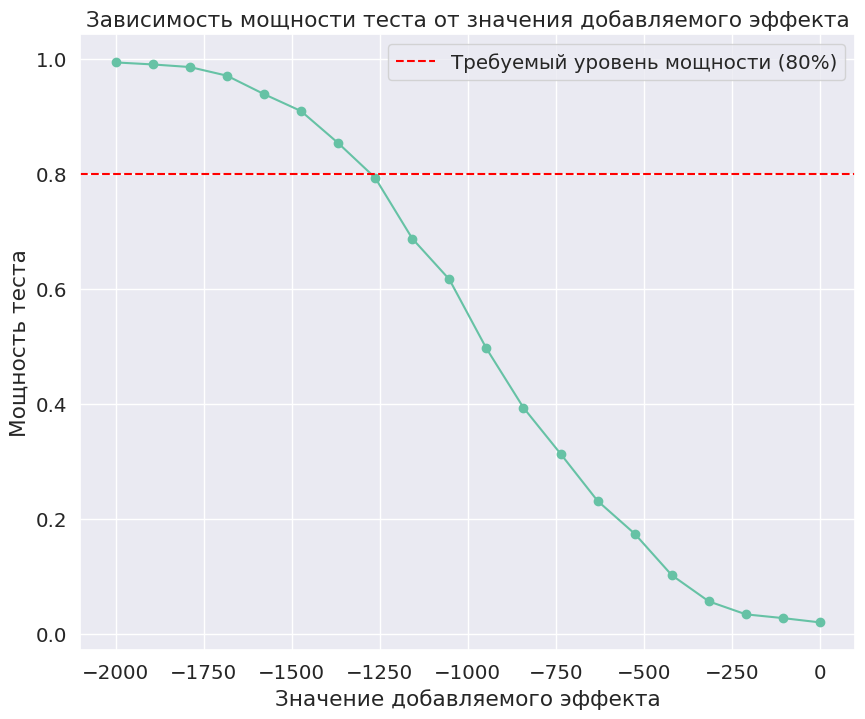

In [ ]:
effects = np.linspace(-2000, 0, 20)
sample_size = 1000
n_iter = 2000
power_values = []
for effect in effects:
    reject_count = 0
    for _ in range(n_iter):
        control_group = data.sample(sample_size, replace=False)
        noise = np.random.normal(loc=0, scale=100, size=sample_size)
        test_group = data.sample(sample_size, replace=False) + effect + noise
        if sps.ttest_ind(control_group, test_group, equal_var=False)[1] < 0.05:
            reject_count += 1
    power_values.append(reject_count/n_iter)

plt.figure(figsize=(10, 8))
plt.plot(effects, power_values, marker='o', linestyle='-')
plt.title("Зависимость мощности теста от значения добавляемого эффекта")
plt.xlabel("Значение добавляемого эффекта")
plt.ylabel("Мощность теста")
plt.axhline(y=0.8, color='red', linestyle='--', label='Требуемый уровень мощности (80%)')
plt.legend()
plt.show()

**Вывод:** Для достижения нужной мощности необходимо дать рекомендацию снизить траты на 1250 и больше тысяче людей, чтобы среднее значение трат у этой группы значимо отличалось от остальных людей.